<a href="https://colab.research.google.com/github/RanganathJoshi/tensorflow-deep-learning/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [128]:
data=pd.read_csv('Heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.Target 

In [11]:
data.shape

(303, 14)

In [12]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

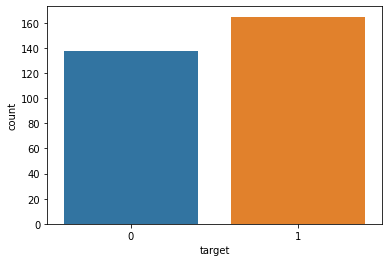

In [13]:
sns.countplot(x=data['target'],data=df)

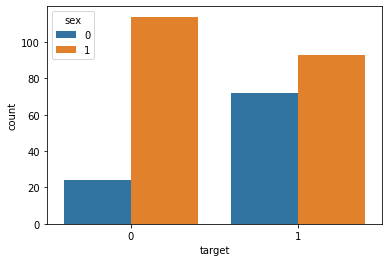

In [17]:
#Finding the relationship between Sex and Target
sns.countplot(x=data['target'],hue='sex',data=df)

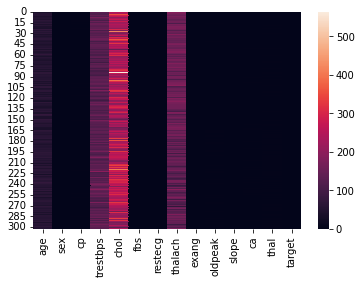

In [18]:
sns.heatmap(data)

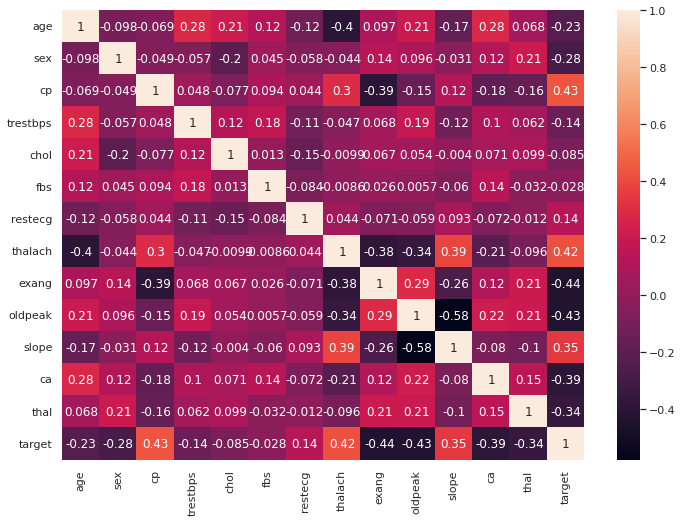

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(),annot=True)

In [24]:
data['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

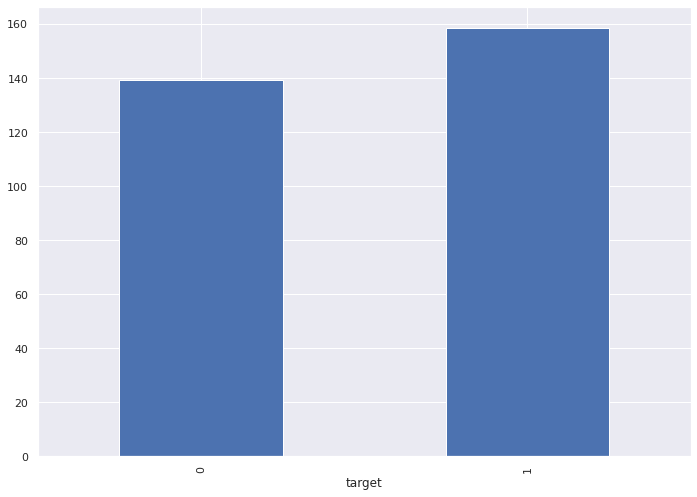

In [35]:
data.groupby(['target'])['thalach'].mean().plot.bar()

**SO hence,we can conclude that the patients with higher heart rate have a chance of heart Disease**

In [69]:
data.groupby(['target'])['age'].mean()

target
0    56.601449
1    52.496970
Name: age, dtype: float64

**So,as we can see the heart disease doesn't depend in age Factor**

//Lets see how blood pressure affects Target Variable

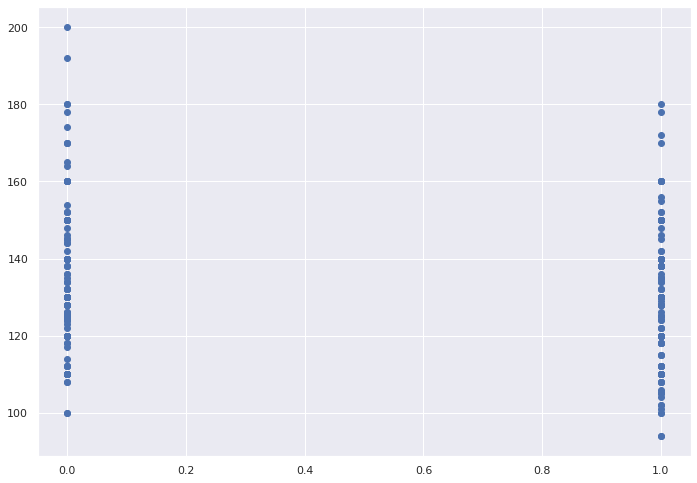

In [81]:
plt.scatter(data['target'],data['trestbps'])

In [82]:
#Hence having higher blood pressure doesn't cause heart disease

##Data Preprocessing

In [85]:
import tensorflow as tf

In [83]:
def create_dataset(dataframe):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  return tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) \
          .shuffle(buffer_size=len(dataframe))

In [87]:
df=create_dataset(data)

In [143]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.2,random_state=True)

In [144]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0


In [ ]:
train=tf.constant(train)
test=tf.constant(test)
test

In [116]:
target_test=test[:,-1]



In [ ]:
target_test

In [ ]:
test=test[:,:-1]
test

In [ ]:
test

In [ ]:
target=train[:,-1]
target

In [ ]:
train=train[:,:-1]
train

##The Model

In [ ]:
model=tf.keras.Sequential([
  tf.keras.Input(shape=train.shape[1]),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=100, activation='relu'),
  tf.keras.layers.Dense(units=100, activation='relu'),
  tf.keras.layers.Dense(units=100, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])
  


model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])


model.fit(train,target,epochs=100)

#Accuracy on the testdata 

In [126]:
model.evaluate(test,target_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.5649 - accuracy: 0.7049


[0.5648657083511353, 0.7049180269241333]

In [150]:
target_test

<tf.Tensor: shape=(61,), dtype=float64, numpy=
array([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1.])>

In [161]:
np.round(model.predict(test)).flatten()

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0.], dtype=float32)